### Import Library

In [53]:
# Pytorch Library
import torch
import torch.nn.init
from torch.autograd import Variable
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

# Other Python Library
import matplotlib.pyplot as plt
import numpy as np
import random

torch.manual_seed(777)  # reproducibility

### Loading MNIST dataset

In [54]:
# MNIST dataset
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

### Data Loader

In [55]:
# Hyper-parameters
batch_size = 100

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True)

### Model을 정의

In [56]:
# Deep Neural Network
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 256, bias=True)
linear6 = torch.nn.Linear(256, 128, bias=True)
linear7 = torch.nn.Linear(128, 10, bias=True)
#relu = torch.nn.ReLU()
sigmoid = torch.nn.Sigmoid()

# xavier initializer
# torch.nn.init.xavier_uniform(linear1.weight)
# torch.nn.init.xavier_uniform(linear2.weight)
# torch.nn.init.xavier_uniform(linear3.weight)
# torch.nn.init.xavier_uniform(linear4.weight)
# torch.nn.init.xavier_uniform(linear5.weight)
# torch.nn.init.xavier_uniform(linear6.weight)
# torch.nn.init.xavier_uniform(linear7.weight)

# model
model = torch.nn.Sequential(linear1, sigmoid,
                            linear2, sigmoid,
                            linear3, sigmoid,
                            linear4, sigmoid,
                            linear5, sigmoid,
                            linear6, sigmoid,
                            linear7, sigmoid)   
model.cuda()

#model.load_state_dict(torch.load('DNN.pkl'))  # Load the Trained Model

print(model)
# print('Weight matrix: ', model.weight.data)
# print('bias vector: ', model.bias.data)


Sequential (
  (0): Linear (784 -> 512)
  (1): Sigmoid ()
  (2): Linear (512 -> 512)
  (3): Sigmoid ()
  (4): Linear (512 -> 512)
  (5): Sigmoid ()
  (6): Linear (512 -> 512)
  (7): Sigmoid ()
  (8): Linear (512 -> 256)
  (9): Sigmoid ()
  (10): Linear (256 -> 128)
  (11): Sigmoid ()
  (12): Linear (128 -> 10)
  (13): Sigmoid ()
)


### Cost 함수 정의

In [57]:
# Softmax 함수가 Cost를 계산할 때 내장되어 있다.
cost_func = torch.nn.CrossEntropyLoss()    

### Model 학습

In [58]:
# Hyper-parameters
learning_rate = 0.001 
training_epochs = 30

# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size

    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        # 이미지를 [batch_size x 784] size 행렬로 변환
        
        X = Variable(batch_images.view(-1, 28 * 28)).cuda()
        Y = Variable(batch_labels).cuda()  # label is not one-hot encoded

        optimizer.zero_grad()             # Zero Gradient Container
        Y_prediction = model(X)           # Forward Propagation
        cost = cost_func(Y_prediction, Y) # compute cost
        cost.backward()                   # compute gradient
        optimizer.step()                  # gradient update

        avg_cost += cost / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost.data[0]))

print('Learning Finished!')

torch.save(model.state_dict(), 'DNN.pkl')  # Save the Model

[Epoch:    1] cost = 2.12370133
[Epoch:    2] cost = 2.04222393
[Epoch:    3] cost = 2.02759147
[Epoch:    4] cost = 1.94956791
[Epoch:    5] cost = 1.89928901
[Epoch:    6] cost = 1.88942504
[Epoch:    7] cost = 1.88493025
[Epoch:    8] cost = 1.77985954
[Epoch:    9] cost = 1.77017868
[Epoch:   10] cost = 1.76827729
[Epoch:   11] cost = 1.76926041
[Epoch:   12] cost = 1.76045632
[Epoch:   13] cost = 1.7427336
[Epoch:   14] cost = 1.73908317
[Epoch:   15] cost = 1.72992957
[Epoch:   16] cost = 1.70174503
[Epoch:   17] cost = 1.68731332
[Epoch:   18] cost = 1.68027472
[Epoch:   19] cost = 1.65042305
[Epoch:   20] cost = 1.63071179
[Epoch:   21] cost = 1.60142553
[Epoch:   22] cost = 1.59689248
[Epoch:   23] cost = 1.59097064
[Epoch:   24] cost = 1.5882411
[Epoch:   25] cost = 1.58205724
[Epoch:   26] cost = 1.56925905
[Epoch:   27] cost = 1.55075991
[Epoch:   28] cost = 1.54901206
[Epoch:   29] cost = 1.54653227
[Epoch:   30] cost = 1.5450722
Learning Finished!


### Test Set을 이용한 모형 성능 측정

In [51]:
# Test the Model
correct = 0
total = 0
for images, labels in mnist_test:
    images = Variable(images.view(-1, 28*28)).cuda()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 17 %


### Random Sample Test

Label:  
 1
[torch.cuda.LongTensor of size 1 (GPU 0)]

Prediction:  
 1
[torch.cuda.LongTensor of size 1x1 (GPU 0)]



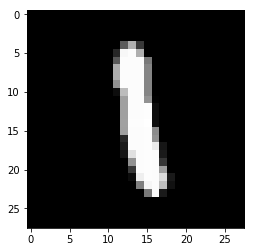

In [36]:
# Get one and predict
r = random.randint(0, len(mnist_test) - 1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()).cuda()
Y_single_data = Variable(mnist_test.test_labels[r:r + 1]).cuda()

single_prediction = model(X_single_data)

print("Label: ", Y_single_data.data)
print("Prediction: ", torch.max(single_prediction.data, 1)[1])

plt.imshow(X_single_data.cpu().data.view(28,28).numpy() , cmap='gray')
plt.show()

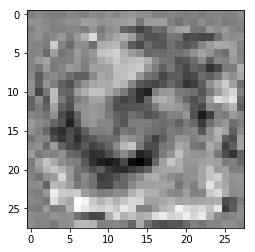

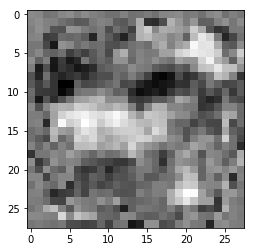

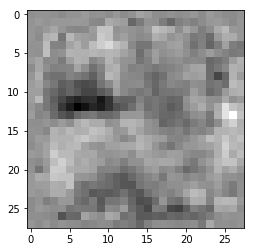

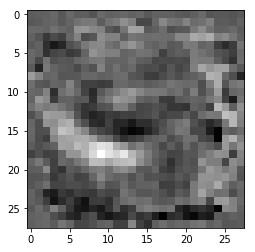

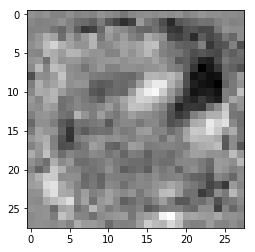

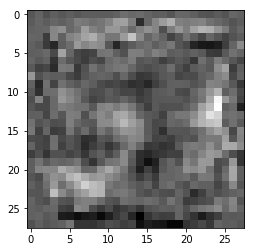

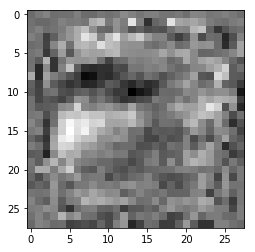

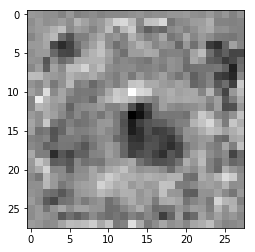

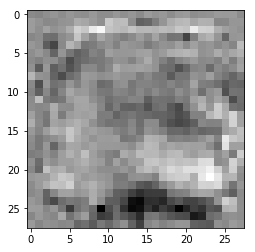

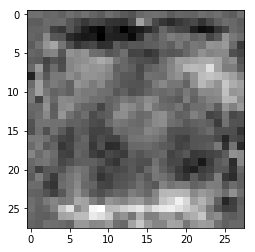

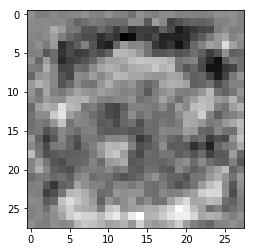

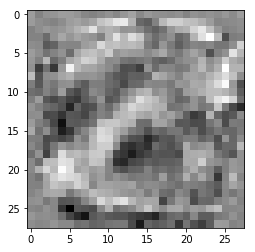

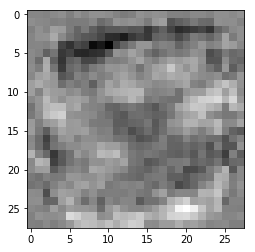

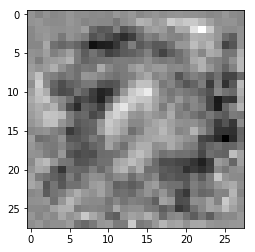

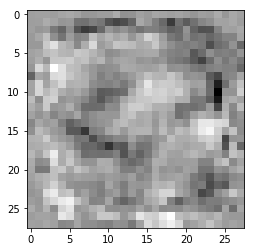

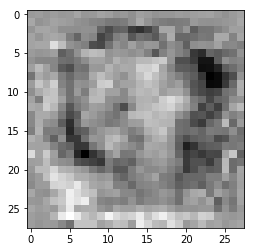

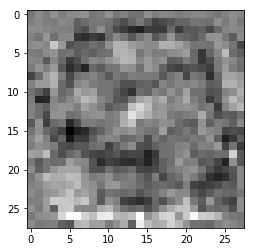

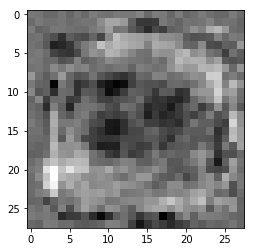

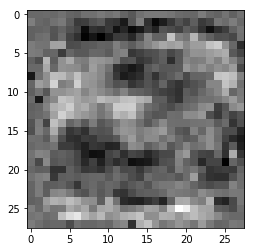

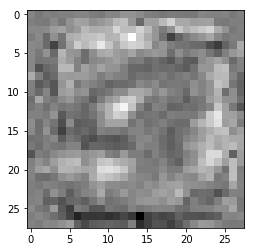

In [44]:
for i in range(20):
    weight = model[0].weight[i,:].data.view(28,28) 
    #weight = torch.abs(model.weight[i,:].data.view(28,28))
    weight = (weight - torch.min(weight))/(torch.max(weight)-torch.min(weight))
    plt.imshow( weight.cpu().numpy(), cmap='gray')
    plt.show()
